In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import datetime as dt
%matplotlib inline

In [2]:
%%time
df=pd.read_excel('retail.xlsx')

Wall time: 2min 29s


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data = ff.create_table(df.head())
data

In [6]:
# drop_duplicates
country_cust_data=df[['Country','CustomerID']].drop_duplicates()

In [7]:
# drop_duplicates
country_cust_data

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [8]:
#Customer distribution by country
data=country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
data.head(6)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21


In [9]:
#Keep only United Kingdom data
data =df.query("Country=='United Kingdom'").reset_index(drop=True)

In [10]:
data.shape

(495478, 8)

In [11]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [12]:
#Remove missing values from CustomerID column, can ignore missing values in description column
data = data[pd.notnull(data['CustomerID'])]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.shape

(361878, 8)

In [14]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
#Validate if there are any negative values in Quantity column
data.query("Quantity < 0").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
121,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
134,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
201,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
202,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
203,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [16]:
data = data.query("Quantity > 0")
data.shape

(354345, 8)

In [17]:
data.query("UnitPrice < 0").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [19]:
#Add new column depicting total amount
data['SaleAmount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
max(data["InvoiceDate"])

Timestamp('2011-12-09 12:49:00')

In [21]:
Latest_Date = dt.datetime(2011,12,10)
Latest_Date

datetime.datetime(2011, 12, 10, 0, 0)

In [22]:
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'SaleAmount': lambda x: x.sum()})
RFMScores

,InvoiceDate,InvoiceNo,SaleAmount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [26]:
RFMScores = RFMScores.rename(columns={"InvoiceDate": "recency", "InvoiceNo": "frequency", "SaleAmount":"monetary"})
RFMScores.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [27]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3921 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    3921 non-null   int64  
 1   frequency  3921 non-null   int64  
 2   monetary   3921 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


In [29]:
#Recency distribution plot
fig = px.histogram(RFMScores, x="recency")
fig.show()

In [31]:
x = RFMScores.query('frequency < 1000')['frequency']
fig = px.histogram(RFMScores, x=x)
fig.show()

In [36]:
x = RFMScores.query('monetary < 10000')['monetary']
fig = px.histogram(RFMScores, x=x)
fig.show()

In [37]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [38]:
def RScoring(x,metric,segments):
    if x <= segments[metric][0.25]:
        return 1
    elif x <= segments[metric][0.50]:
        return 2
    elif x <= segments[metric][0.75]: 
        return 3
    else:
        return 4

In [39]:
def FnMScoring(x,metric,segments):
    if x <= segments[metric][0.25]:
        return 4
    elif x <= segments[metric][0.50]:
        return 3
    elif x <= segments[metric][0.75]: 
        return 2
    else:
        return 1

In [40]:
RFMScores["R"] = RFMScores["recency"].apply(RScoring, args=("recency", quantiles))
RFMScores["F"] = RFMScores["frequency"].apply(FnMScoring, args=("frequency", quantiles))
RFMScores["M"] = RFMScores["monetary"].apply(FnMScoring, args=("monetary", quantiles))

In [41]:
RFMScores.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [42]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

# #Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.reset_index()
RFMScores.head()

,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [43]:
loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']

In [44]:
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = loyalty_Level)

In [46]:
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [50]:
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("monetary < 50000 and frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [51]:
RFMScores

,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver
12747.0,2,103,4196.01,1,1,1,111,3,Platinum
12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
12749.0,3,199,4090.88,1,1,1,111,3,Platinum
12820.0,3,59,942.34,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronze
18281.0,180,7,80.82,4,4,4,444,12,Bronze
18282.0,7,12,178.05,1,4,4,144,9,Silver


In [56]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [57]:
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.monetary]
RFMScores['Frequency'] = [handle_neg_n_zero(x) for x in RFMScores.frequency]
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,0.693,4.635,8.342
12748.0,0.000,8.433,10.426
12749.0,1.099,5.293,8.317
12820.0,1.099,4.078,6.848
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


In [58]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
#ax = sns.distplot(Recency_Plot)

fig = px.histogram(RFMScores, x=Recency_Plot)
fig.show()

In [59]:
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
fig = px.histogram(RFMScores, x=Frequency_Plot)
fig.show()

In [60]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
fig = px.histogram(RFMScores, x=Monetary_Plot)
fig.show()

In [61]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [62]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935
...,...,...,...
18280.0,1.281508,-1.014157,-1.075421
18281.0,0.989336,-1.280702,-1.718015
18282.0,-1.211788,-0.878270,-1.086610


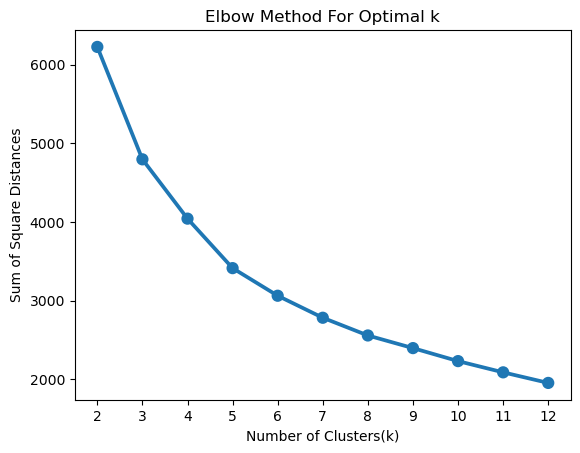

[6226.760687601403,
 4796.942474866961,
 4042.4817054403607,
 3412.8984942689917,
 3061.827101256073,
 2781.823184350819,
 2556.498683696318,
 2395.6815074779165,
 2230.322886440165,
 2087.39926601874,
 1952.8222007964023]

In [63]:
from sklearn.cluster import KMeans
import seaborn as sns 

sum_of_sq_dist = []
for k in range(2,13):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km.fit_predict(Scaled_Data)
    sum_of_sq_dist.append(km.inertia_)
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(y = list(sum_of_sq_dist), x = list(range(2,13)))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()
sum_of_sq_dist

In [64]:
# Inertia rate of change per cluster
change_rate = []
for idx, err in enumerate(sum_of_sq_dist):
    next_idx = idx + 1
    if next_idx < len(sum_of_sq_dist):
        diff = (err - sum_of_sq_dist[next_idx])/err
        change_rate.append(diff*100)
    else:
        break
change_rate

[22.962472535382112,
 15.727951155960538,
 15.574175891113558,
 10.28660517159959,
 9.144994398618605,
 8.099885784332612,
 6.290524506974663,
 6.902362460185076,
 6.408203103253195,
 6.44711663039981]

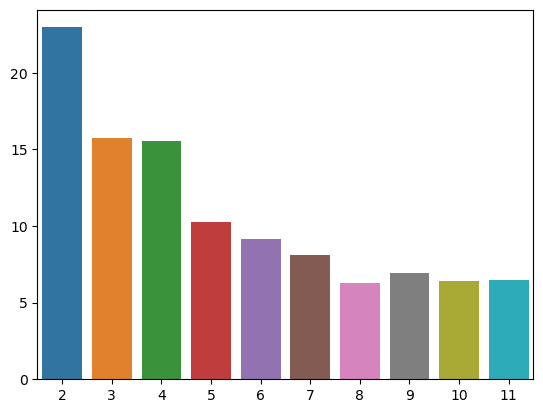

In [65]:
sns.barplot(y=change_rate, x=list(range(2,12)))
plt.show()

In [66]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,recency,frequency,monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency,Monetary,Frequency,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,325,77183.60,1,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,2,4196.01,103,1
12748.0,0,4596,33719.73,1,1,1,111,3,Platinum,1,33719.73,4596,1
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,3,4090.88,199,1
12820.0,3,59,942.34,1,2,2,122,5,Platinum,3,942.34,59,1


In [67]:
# Prediction
person = pd.DataFrame({"Recency": [1.389971], "Frequency": [-2.733639], "Monetary": [3.766415]})
pred = KMean_clust.predict(person)
pred

array([2])

<Figure size 700x700 with 0 Axes>

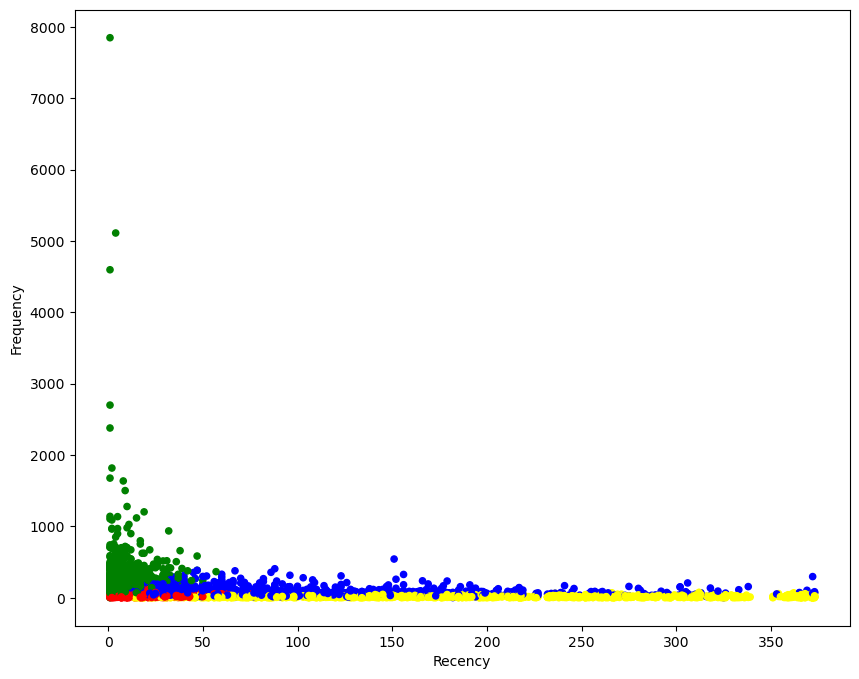

In [68]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", 'yellow']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [69]:
import joblib

In [70]:
joblib.dump(KMean_clust, "segmentation")

['segmentation']

In [71]:
model = joblib.load("segmentation")
model.predict(person)

array([2])

In [72]:
import pickle